# 필요 라이브러리 호출하기

### 빈칸 혹은 "***************" 적혀 있는 곳에 코드를 작성하면 됩니다. 빈칸이 아닌 곳은 그냥 진행하시면 됩니다!

pandas, numpy 등 데이터 읽기에 필요한 라이브러리를 호출해줍니다. 

In [28]:
#필요 라이브러리 호출(판다스, 넘파이)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 파일 읽기

pandas의 read_csv를 활용하여 csv 파일을 데이터프레임 형태로 불러옵니다.

In [29]:
#파일 불러오기
data = pd.read_csv('./FIFA.csv')

데이터의 원본을 보존하는 것은 중요합니다. 따라서 data를 copy해서 데이터 분석을 진행해야합니다.

In [30]:
data_1 = data.copy()

## 데이터 구조 확인

                                                      <데이터 변수 설명>

| 변수 | 설명 
| --- | --- | 
| id | 선수 고유의 아이디 |  
| name | 이름 |
| age | 나이 |
| continent | 선수들의 국적이 포함되어 있는 대륙 | 
| contract_until | 선수의 계약기간 만료시기 |  
| position | 선수가 선호하는 포지션 ex) 공격수, 수비수|  
| prefer_foot | 선수가 선호하는 발 ex) 오른발 |  
| reputation | 선수가 유명도 - 높은 수치일 수록 유명한 선수 |  
| stat_overall | 선수의 현재 능력치 |  
| stat_potential | 선수가 경험 및 노력을 통해 발전할 수 있는 정도 |  
| stat_skill_moves | 선수의 개인기 능력치 |  
| value | FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) |  


df.head(), df.describe(), df.info()로 전반적인 데이터프레임의 구조를 확인해볼 수 있습니다. 

## 데이터프레임 하위 7개 행을 확인해보세요!

In [31]:
# head를 활용하여 데이터프레임 상위 5개 행 확인
data_1.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,11784.0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,2436.0,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,8196.0,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,16446.0,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,7388.0,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000


In [32]:
# tail을 활용하여 데이터프레임 하위 7개 행 확인
data_1.tail()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8927,5424.0,D. Odoi,30,europe,2019,DF,right,1,69.0,69.0,3,775000
8928,16664.0,M. Tilio,16,oceania,2019,MF,left,1,52.0,69.0,2,100000
8929,13515.0,V. Myhra,21,europe,2018,GK,right,1,61.0,72.0,1,350000
8930,876.0,R. Vormer,30,europe,2022,MF,right,2,78.0,78.0,3,9500000
8931,13317.0,H. Eisa,25,africa,2019,ST,right,1,61.0,NaN,2,350000


# 결측치 처리

## 결측치 확인
dataframe.info()를 통해서 데이터프레임의 자료형, 결측치 개수를 알 수 있습니다.

In [33]:
# 결측치 확인 info를 활용하세요
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8756 non-null   float64
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   int64  
 8   stat_overall      8802 non-null   float64
 9   stat_potential    7140 non-null   float64
 10  stat_skill_moves  8932 non-null   int64  
 11  value             8932 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [34]:
# 명확한 NaN 값을 확인하기 위해서 isnull()을 활용합니다. 
data_1.isnull().sum() #작성!

id                   176
name                   0
age                    0
continent              0
contract_until         0
position               0
prefer_foot            0
reputation             0
stat_overall         130
stat_potential      1792
stat_skill_moves       0
value                  0
dtype: int64

- df.info(), df.isnull().sum으로 확인해 본 결과, id, stat_overall, stat_potential에 결측치가 존재하는 것을 알 수 있습니다.<br>
- name, continent, contract_until, position, prefer_foot의 데이터 타입인 object는 pandas에서 문자열 type라고 생각해주시면 됩니다.<br>

그럼 결측치가 존재하는 id, stat_overall, stat_potential의 결측치를 처리하는 과정을 각각 진행해보도록 하겠습니다.

## describe을 활용해 데이터의 평균, 4분위수, 최소값, 최대값을 확인해보세요!

In [35]:
#데이터프레임 각 칼럼의 통계치 확인

## id
id column은 value를 예측하는데 도움이 되지 않기 때문에 해당 column 전체를 삭제합니다.<br>


id column 전체를 삭제해보세요!(Hint: df.drop을 활용해보세요)

In [36]:
data_1 = data_1.drop('id', axis = 1) #작성!
data_1.head()

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000


## prefer_foot

value_counts를 통해 prefer_foot의 value 및 결측치의 개수를 확인하고, 최빈값으로 대체함으로써 결측치를 처리해줍니다.

value_counts를 통해서 prefer_foot의 값들을 확인해 보세요! isnull()로 확인하지 못한 결측치를 확인할 수 있습니다.

In [37]:
data_1['prefer_foot'].value_counts()

prefer_foot
right    6452
left     1980
?         500
Name: count, dtype: int64

### 결측치를 최빈값으로 대체해보세요

In [38]:
#결측치를 최빈값인 right로 대체
data_1["prefer_foot"].replace("?", np.nan, inplace = True)
data_1['prefer_foot'].fillna(data_1['prefer_foot'].mode()[0], inplace = True)
data_1["prefer_foot"].unique()

array(['right', 'left'], dtype=object)

In [39]:
#결측치 처리 확인
data_1[['prefer_foot']].value_counts()

prefer_foot
right          6952
left           1980
Name: count, dtype: int64

## stat_potential
stat_potential, stat_overall 간의 관계를 파악하고, 상관계수가 높다면 각각의 값을 이용하는 방법으로 결측치를 처리해줍니다.

상관관계를 확인할 때, 시각화를 이용하기 위해 시각화를 위한 라이브러리를 불러옵니다.

In [40]:
#시각화를 위해 matplotlib 호출
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scatter plot, heatmap을 이용해 두 변수 간 상관관계를 확인해줍니다.

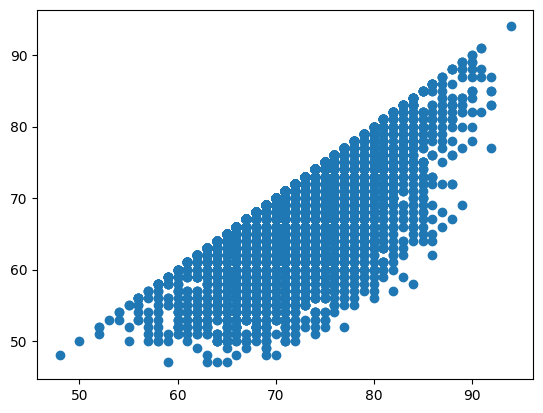

In [41]:
# scatterplot을 통해 상관관계 확인

plt.scatter(data_1.stat_potential, data_1.stat_overall)

<Axes: >

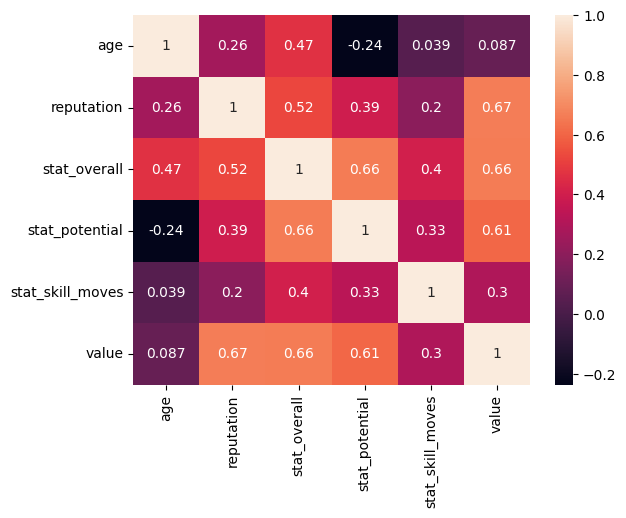

In [42]:
# heatmap을 통해 상관계수 파악
import seaborn as sns
col = ['age', 'reputation','stat_overall', 'stat_potential', 'stat_skill_moves', 'value']
data_2 = data_1[col]
sns.heatmap(data_2.corr(), annot = True)

- scatter plot을 봤을 때 두 변수간 선형 관계가 존재하고, heatmap에서도 상관계수가 0.66임을 알 수 있습니다.
- 따라서 "stat_potential" 의 결측치를 'stat_overall'의 값으로 대체합니다.
- 다음으로 'stat_overall'의 결측치를 "stat_potential"로 대체합니다.

In [43]:
data_1["stat_potential"].value_counts()

stat_potential
70.0    495
72.0    492
71.0    476
69.0    457
73.0    436
74.0    414
68.0    412
75.0    409
67.0    380
66.0    364
76.0    312
77.0    295
65.0    242
78.0    241
64.0    221
79.0    215
80.0    201
63.0    158
81.0    150
82.0    120
62.0    112
83.0     97
84.0     85
61.0     59
85.0     51
60.0     49
86.0     37
59.0     22
58.0     21
87.0     21
88.0     21
89.0     16
90.0     13
56.0     11
57.0     10
92.0      6
91.0      5
55.0      4
52.0      3
54.0      3
53.0      1
50.0      1
48.0      1
94.0      1
Name: count, dtype: int64

In [44]:
#각각의 값으로 대체
data_1['stat_potential'].fillna(data_1["stat_overall"], inplace = True)
data_1['stat_overall'].fillna(data_1["stat_potential"], inplace = True)

In [45]:
data_1["stat_potential"].isnull().sum()

20

In [46]:
data_1["stat_overall"].isnull().sum()

20

In [47]:
#결측치 처리 확인
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8932 non-null   object 
 1   age               8932 non-null   int64  
 2   continent         8932 non-null   object 
 3   contract_until    8932 non-null   object 
 4   position          8932 non-null   object 
 5   prefer_foot       8932 non-null   object 
 6   reputation        8932 non-null   int64  
 7   stat_overall      8912 non-null   float64
 8   stat_potential    8912 non-null   float64
 9   stat_skill_moves  8932 non-null   int64  
 10  value             8932 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 767.7+ KB


-  stat_overall과 stat_potential 모두 결측치가 존재하는 row는 20개입니다. 따라서, 최종적으로 결측치 20개가 존재합니다.
-  값을 삭제해도 모델 학습에 큰 무리가 없으므로, 해당 row를 삭제함으로써 결측치를 처리해줍니다.

In [53]:
#결측치 삭제 dropna를 활용하여 진행합니다! 
data_1.dropna(subset= ['stat_overall', 'stat_potential'] , inplace=True) #작성!

- 특정 칼럼에만 nan값이 있는지 확인하고 있을 경우, subset을 이용한다.
- how = "all" : 특정 행의 모든 값이 널값이어야 삭제한다.
- how = "any" : 특정 행에서 널값이 하나라도 있으면 삭제한다.

In [54]:
#결측치 처리 결과 확인
data_1.isnull().sum()

name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64